# Problem Set 4

## 1) Buffer Stock Saving and Balance Sheets

#### a) 

#### i) The BeNefit at time 0 is N$_{0}$ = $\eta$l$_0$W$_0$ where 0 < $\eta$ < 1. Explain why even an infinitely risk averse private lender will be willing to lend an employed consumer any amount less than $\underline H_{-1}$ $\equiv$ N$_0$/r



We need to find the lowest possible borrowing limit because the lender is infinitely risk averse. The worst scenario for a working consumer is that s/he became unemployed/retired next period and then stay unemployed/retired for the rest of the life. In the worst case scenario, the consumer will be getting N$_0$, N$_1$, N$_2$, ... starting from the unemployed/retirement time and so on. Moreover, assume that labor income does not decline over time as N$_0$ $\leq$ N$_1$ $\leq$ N$_2$....

When we are at the time -1, we need to find present discounted value of all future benefits so that the infinitely risk averse lender would give any amount less that it.

\begin{eqnarray}
PDV_{-1}(N) = \frac{N_0}{R} + \frac{N_1}{R^2} + \frac{N_2}{R^3} + ..... 
\geq \frac{N_0}{R} + \frac{N_0}{R^2} + \frac{N_0}{R^3} + .....  = \frac{N_0}{R}(1 + \frac{1}{R} + \frac{1}{R^2} + ....) = \frac{N_0}{r}
\end{eqnarray}

Thus in the worst case scenario, the lender can exctract $\underline H_{-1}$ $\equiv$ $\frac{N_0}{r}$ which is the present discounted value of all benefits.

#### ii) Explain the role of return impatiance condition in guaranteeing the unemployed consumer's problem's solution.

Note that the unemployed consumer's problem is;
\begin{eqnarray}
c_{t}^u = \Big(1-\frac{(R\beta)^{\frac{1}{\rho}}}{R}\Big)(b_{t}+PDV_{t}(N)) \quad where \quad b_t = A_{t-1}R\\
A_{-1}>-N_{0}/r = -PDV_{-1}(N)
\end{eqnarray}
Total resources ($b_{t}$+$PDV_{t}$(N))  are positive by assumption. Therefore, if return impatiance condition holds, the consumer will have strictly positive consumption throughout their unemployed life. Moreover, if the return impatiance condition does not hold, the present discounted value of consumption goes ti infinity because this is an infinite horizon problem.

#### iii) Explain the equivalance of unemployment insurance system with the lump sum payment of N$_{0}$(R/r)

\begin{eqnarray}
PDV_{0}(N) = \frac{N_{0}R}{r} 
\end{eqnarray}
The consumption formula in part ii states that the consumer make its consumption decision based on the total resources. Timing of the resources does not matter. Thus, giving N$_{0}$ each unemployed period is same as giving N$_0$R/r at the beginning of the unemployed state.

#### iv)Explain the normalized version of  $\underline H_{-1}$

\begin{eqnarray}
\underline h_{-1} = \frac{\underline H_{-1}}{l_{-1}W_{-1}} = \frac{N_{0}/r}{l_{-1}W_{-1}} = \frac{\eta l_{0}W_{0}}{rl_{-1}W_{-1}} = \frac{\eta \Gamma}{r}
\end{eqnarray}

#### v) Leftward Shifted Consumption Function

In [54]:
import matplotlib.pyplot as plt

import sys 
import os
sys.path.insert(0, os.path.abspath('../lib'))

import numpy as np
import HARK # Prevents import error from Demos repo
from time import clock
from copy import deepcopy
mystr = lambda number : "{:.3f}".format(number)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from HARK.utilities import plotFuncs
from HARK.ConsumptionSaving.TractableBufferStockModel import TractableConsumerType

In [55]:
# Define a parameter dictionary and representation of the agents for the tractable buffer stock model
TBS_dictionary =  {'UnempPrb' : .00625,    # Probability of becoming unemployed
                   'DiscFac' : 0.975,      # Intertemporal discount factor
                   'Rfree' : 1.01,         # Risk-free interest factor on assets
                   'PermGroFac' : 1.0025,  # Permanent income growth factor (uncompensated)
                   'CRRA' : 2.5}           # Coefficient of relative risk aversion
MyTBStype = TractableConsumerType(**TBS_dictionary)

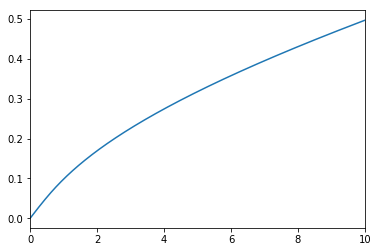

In [42]:

MyTBStype.solve()
MyTBStype.solution[0].cFunc(m)
mPlotTop=10
plotFuncs([MyTBStype.solution[0].cFunc],0.,mPlotTop)

Introduction of such a system moves the above function leftwards because having 0 amount of market resources in any period does not cause consumers to consume 0 consumption. Whenever a consumer become debted in the maximum amount, then the consumer faces the risk of ending up with 0 consumption. If we draw the $\Delta$m$^e_{t+1}$ locus, it can intersect with the new shifted consumption function when the market resources are negative. The intersection point represent the Steady State level which showed a negative bank balance level.

#### vi) Explain why the expansion of unemployment benefits is same as a relaxation of a "natural borrowing constraint"

Note that the natural borrowing constraint is found as the present discounted value of all resources. When an unemployment benefit is introduced, present dicounted value of resources increase as we showed in the part ii. Therefore, it has the same effects as relaxing the natural borrowing constraint. This model differs from the Perfect Foresight Model because here the consumers are making a precautionary savings when their market resources are low. If the natural borrowing constraint relaxed for them, they would be making less precautionary saving at every level of resources.


#### b) 

#### i) Consumers become more optimistic about the future unemployment probability

First we need to consider how the two loci moves from the change.
\begin{eqnarray}
c^e &=& \frac{R\kappa \Pi}{1+R\kappa \Pi}m^e \\
c^e &=& \frac{1}{1-R}m^e + \frac{1}{R}\\
where \\
\Pi &=& \Big({\frac{p_{\Gamma}^{-\rho} -1 + \mho}{\mho}}\Big)^{\frac{1}{\rho}} \\
\kappa &=& 1 - p_{R}\\
R &=& \frac{R}{\Gamma}\\
\Gamma &=& \frac{G}{1-\mho}
\end{eqnarray}
When the unemployment probability $\mho$ goes down, $\Gamma$ decreases, R increases and $\Pi$ increases. Therefore, the slope of both $\Delta$c$_t$ = 0 and $\Delta$m$_t$ = 0 loci increases. However, the intercept of the $\Delta$m$_t$ = 0 locus decreases as can be seen from the equations above.

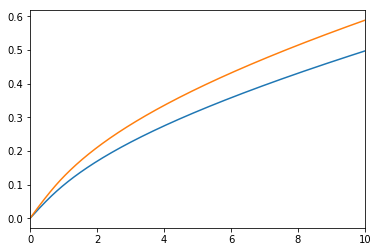

In [50]:
MyTBStype.solve()
MyTBStype.solution[0].cFunc(m)
mPlotTop=10
NewExample = deepcopy(MyTBStype)
NewExample.UnempPrb = .00325
NewExample.solve()
plotFuncs([MyTBStype.solution[0].cFunc,NewExample.solution[0].cFunc],0.,mPlotTop)


As the unemployment probability decreases, the consumption target increase and the wealth target decrease. The main factor behind this change is consumer's decrease their precautionary savings. 6 years later when the unemployment probability return back to its original level, the graphs return back to their previous position and we end up with the initial target level of consumption as well as wealth level. 

For the savings rate, whenever the unemployment probability decreased, it suddenly decreases to a lower level. However, this low savings rate start to converge to a level which is lower than the original level. 6 years later, the savings rate suddenly increases and then converges to the initial savings rate.

#### ii) Consumers become optimistic about the future income growth

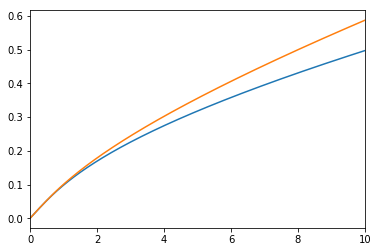

In [53]:
NewExample2 = deepcopy(MyTBStype)
NewExample2.PermGroFac = 1.1
NewExample2.solve()
plotFuncs([MyTBStype.solution[0].cFunc,NewExample2.solution[0].cFunc],0.,mPlotTop)

This time slopes of the loci decrease leading us to a higher target level of consumption as well as wealth. The consumption function remained the same for the low levels of market resources. Intuitively, this expected increase in the income growth rate did not relax the low level asset holders. However, the kink point, the point which the asset level is sufficient to not to be borrowingly constrained, is lower. For the savings rate, it jumps upwards as the income increased both savings and consumption increase. Then steadily it goes down to a level which is slightly higher than the initial point. After 6 years, the consumption function reverts back to initial position. This time savings rate decreases suddenly and then converges to the initial level.

#### iii) Increase in the unemployment insurance system

This effect will be similar to the introduction of an unemployment insurance system. Now, the consumption function will move more to the left. The shift was $\eta$/r now $\eta$ is increased so the shift increased too. Target level of market resources will be decreasing and again the steady state level could be negative. Target level of consumption should be higher. 6 years later, the consumption function returns back to the initial one. For the saving rate, it diminishes first as the precautionary savings as declined. Then is converges to a level which is less than the initial position. 6 years later, it jumps to a higher level and then converge to the initial level.

## 2) Asset Pricing in a Financial Crisis

#### a) Permanent drop in the level of dividens per share of S to half.

In the Lucas Asset Pricing model, we found that Prices are present dicounted value of dividens. Therefore, whenever the dividend per share of subprime debt decrease by half, its price declines as well. Price of other risky assets do not change as its dividend per share did not change. Price/divident ratio remains the same for the two types of assets because it is determined by the discount factor. The discount factor did not change therefore the price/divident ratios are remaining the same.

#### b) The variance of the dividends of a share of S is higher whereas the mean value remains the same.

The prices remain the same when the subprime debt became more riskier given that its mean is remaining the same. When we consider the ratios, they also remain the same as they are determined by the discount factor. 

#### c) Increase in the level of risk aversion.

Increase in the CRRA coefficient should effect the discount rate. I expect the dicount rate to go down because of the high risk aversion. Consumer's want to consume today more because the future consumption is risky. If we assume the discount factor to decrease, then the dividend price ratio increases. I expect the price of both assets decrease and the ratios to be increased.